### Bibliotecas

In [ ]:
from skimage.io import imread_collection, imsave, imread
import os
import glob
import matplotlib.pyplot as plt

### GFP-GAN

In [ ]:
#!git clone https://github.com/TencentARC/GFPGAN.git

In [ ]:
%cd GFPGAN

/content/GFPGAN


In [ ]:
#!pip install basicsr
#!pip install facexlib
#!pip install realesrgan
#!pip install -r requirements.txt
#!python setup.py develop

In [ ]:
#!wget https://github.com/TencentARC/GFPGAN/releases/download/v1.3.0/GFPGANv1.3.pth

In [ ]:
nome_modelo = 'GFPGANv1.3.pth'

In [ ]:
!mv {nome_modelo} experiments/pretrained_models/{nome_modelo}

### Imagens originais

In [ ]:
imagens = imread_collection('../imagens/*.jpg')


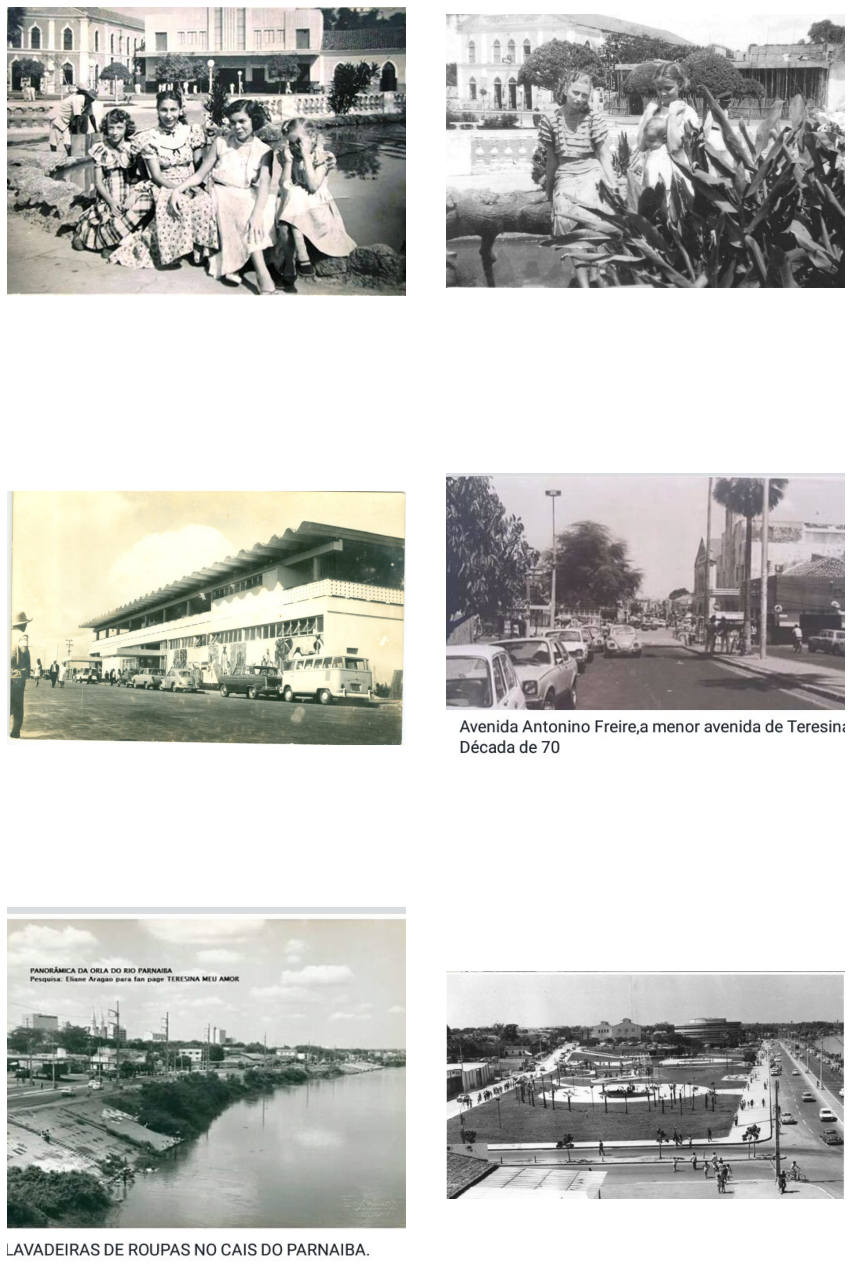

In [ ]:
# Crie uma grade de subparcelas de 3x2
fig, axs = plt.subplots(3, 2, figsize=(15, 25))

# Ajustar o espaçamento entre as subparcelas
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Plotar as imagens nas subparcelas
for i, ax in enumerate(axs.flat):
  ax.imshow(imagens[i])
  ax.axis('off')

# Mostrar o gráfico
plt.show()

### Aplicação GFP-GAN

In [ ]:
image_paths = glob.glob("../imagens/*.jpg")

In [ ]:
image_paths

['../imagens/teresina39.jpg',
 '../imagens/teresina37.jpg',
 '../imagens/teresina42.jpg',
 '../imagens/teresina20.jpg',
 '../imagens/teresina31.jpg',
 '../imagens/teresina29.jpg']

In [ ]:
for i in range(len(image_paths)):
  !python inference_gfpgan.py -i {image_paths[i]} -o results -v 1.3 -s 8 --bg_upsampler realesrgan

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Processing teresina39.jpg ...
	Tile 1/4
	Tile 2/4
	Tile 3/4
	Tile 4/4
Results are in the [results] folder.
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0

### Resultados

In [ ]:
imagens_results = imread_collection('results/restored_imgs/*.jpg')

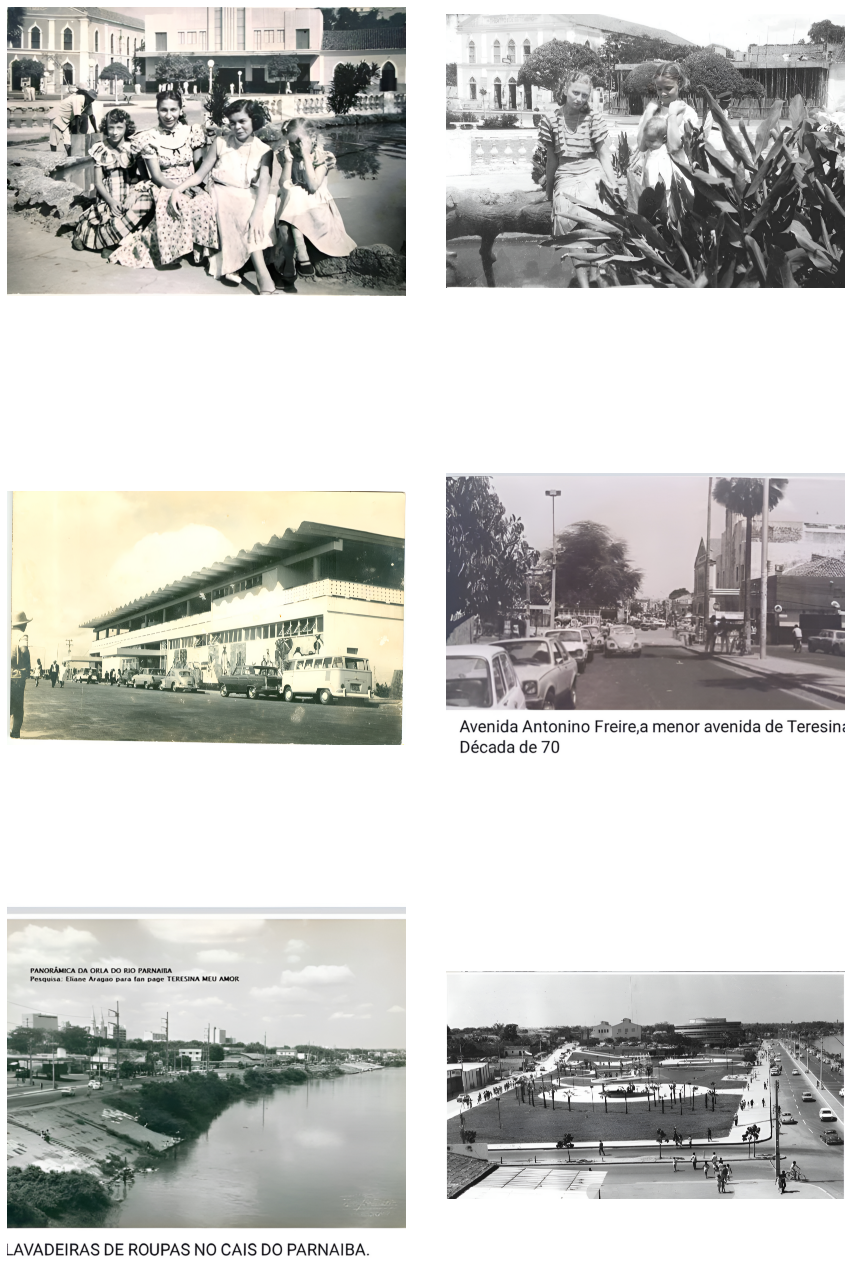

In [ ]:
# Crie uma grade de subparcelas de 3x2
fig, axs = plt.subplots(3, 2, figsize=(15, 25))

# Ajustar o espaçamento entre as subparcelas
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Plotar as imagens nas subparcelas
for i, ax in enumerate(axs.flat):
  ax.imshow(imagens_results[i])
  ax.axis('off')

# Mostrar o gráfico
plt.show()